#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

In [ ]:
#import library
import pandas as pd # pandas 
import numpy as np # numpy
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import time

# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [ ]:
# read data using Pandas DataFrame
def read_dataset(path):
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


<Axes: xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

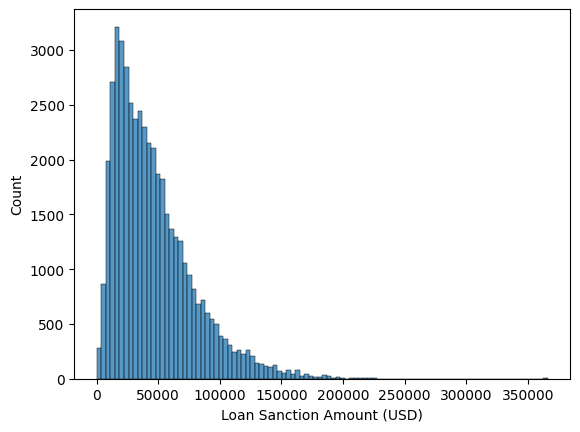

In [ ]:
PATH = "./final_house_loan.csv" # Path to your file

df = read_dataset(PATH)
sns.histplot(x="Loan Sanction Amount (USD)", data=df, bins=100)

## Data Analysis

In [ ]:
# Data analysis
# Check NULL value
print(f"Total features NULL values: \n{df.isnull().sum()}")
print(f"Sample size: {len(df)}")
df.dropna(inplace=True)
print(f"Sample size after remove NULL values: {len(df)}")
print("Correlation matrix between featurs: \n")
df.corr()

Total features NULL values: 
Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64
Sample size: 47297
Sample size after remove NULL values: 47251
Correlation matrix between featurs: 



,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
Age,1.000000,-0.044086,-0.044085,-0.003274,-0.000115
Income (USD),-0.044086,1.000000,0.999986,0.358110,0.392897
Property Age,-0.044085,0.999986,1.000000,0.358110,0.392892
Property Price,-0.003274,0.358110,0.358110,1.000000,0.994429
Loan Sanction Amount (USD),-0.000115,0.392897,0.392892,0.994429,1.000000


## Preprocessing

In [ ]:
def preprocessing_data(df):
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    return df

In [ ]:
df = preprocessing_data(df.copy())
df

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336
...,...,...,...,...,...,...,...,...
47292,0,62,2121.48,1,2135.48,0,240291.63,78800.491330
47293,1,38,1506.72,1,1505.72,0,218431.37,72483.293359
47294,0,20,1595.10,1,1582.10,1,154458.88,52462.861498
47295,0,50,2002.27,1,2007.27,1,72277.78,22909.596763


## Feature Engineering

In [ ]:
def normalize_data(df):
    # Todo: normalize data into numerical data
    scaler = StandardScaler()
    labels = df['Loan Sanction Amount (USD)']
    scaled_features = scaler.fit_transform(df.values)
    df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
    df['Loan Sanction Amount (USD)'] = labels
    return df

     Gender       Age  Income (USD)  Income Stability  Property Age  \
0 -0.999133 -1.305774     -0.606838          0.312589     -0.600375   
1  1.000868 -0.684130     -0.383131          0.312589     -0.382454   
2 -0.999133 -0.186815     -0.472881          0.312589     -0.468349   
3  1.000868  1.553786      0.095452         -3.199092      0.103172   
4 -0.999133  1.367293      1.383666         -3.199092      1.382990   

   Property Location  Property Price  Loan Sanction Amount (USD)  
0          -1.211235       -0.797694                21026.420753  
1           1.263183        0.473190                60595.183366  
2          -1.211235       -0.188179                39181.648002  
3          -1.211235        2.318560               128497.710865  
4           1.263183       -0.560805                39386.919336  


<Axes: >

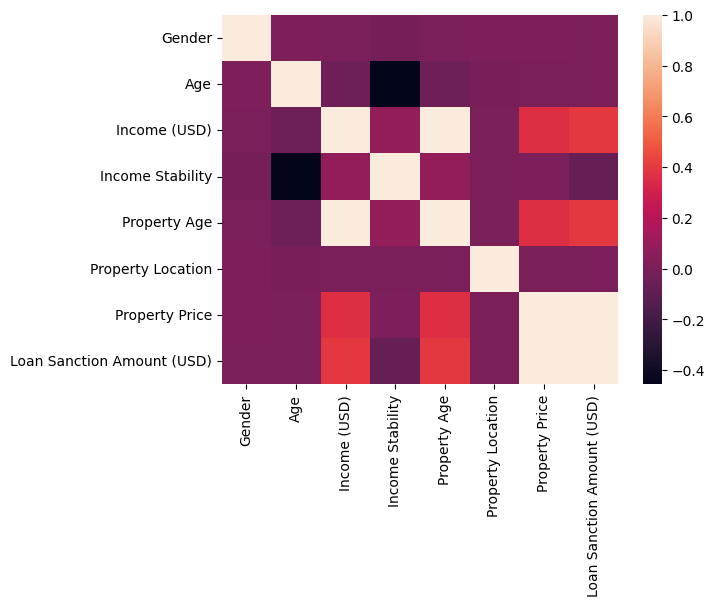

In [ ]:
# Heatmap
df = normalize_data(df.copy())
print(df.head())
sns.heatmap(df.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    X = df.drop('Loan Sanction Amount (USD)', axis=1)
    y = df['Loan Sanction Amount (USD)']
    return X, y

X, y = prepare_X_y(df)
X, y

(         Gender       Age  Income (USD)  Income Stability  Property Age  \
 0     -0.999133 -1.305774     -0.606838          0.312589     -0.600375   
 1      1.000868 -0.684130     -0.383131          0.312589     -0.382454   
 2     -0.999133 -0.186815     -0.472881          0.312589     -0.468349   
 3      1.000868  1.553786      0.095452         -3.199092      0.103172   
 4     -0.999133  1.367293      1.383666         -3.199092      1.382990   
 ...         ...       ...           ...               ...           ...   
 47292 -0.999133  1.367293     -0.298536          0.312589     -0.289517   
 47293  1.000868 -0.124651     -0.693205          0.312589     -0.693800   
 47294 -0.999133 -1.243609     -0.636466          0.312589     -0.644767   
 47295 -0.999133  0.621321     -0.375068          0.312589     -0.371823   
 47296 -0.999133  0.372664     -1.344060          0.312589     -1.340777   
 
        Property Location  Property Price  
 0              -1.211235       -0.797694 

In [ ]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=42)
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))
    return trainX, testX ,trainY, testY

In [ ]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


## Basic Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )
linear_reg_mae = mean_absolute_error(pred, testY)
print(model.coef_)
print()
print(model.intercept_)

mean absolute error of linear model on train set  148.23672501556618
mean absolute error of linear model on test set  148.78528830575468
[ -118.60648472 -1279.93615873   896.01716903 -3177.67149148
   704.2370231    -52.88331386 31803.3671051 ]

46473.080192396636


In [ ]:
from sklearn.linear_model import Lasso

def build_lasso_model(X, y):
    model = Lasso(alpha=5)
    model.fit(X, y)
    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )
lasso_mae = mean_absolute_error(pred, testY)

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  147.0174431882699
mean absolute error of linear model on test set  147.53820493144582
[ -113.46127024 -1270.46874851  1355.26802046 -3167.93449745
   241.0698361    -47.81616039 31799.76275035]

46473.09856136823


In [ ]:
from sklearn.linear_model import Ridge

def build_ridge_model(X, y):
    model = Ridge(alpha=30)
    model.fit(X, y)
    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )
ridge_mae = mean_absolute_error(y_pred=pred, y_true=testY)
print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of linear model on train set  141.11275983918551
mean absolute error of linear model on test set  141.81188244127466
[ -118.27931932 -1276.84506815   806.34439952 -3174.07376521
   804.77143428   -52.58938846 31770.65356288]

46473.03867461582


In [ ]:
from sklearn.linear_model import ElasticNet

def build_elastic_model(X, y):
    model = ElasticNet(alpha=2e-3)
    model.fit(X, y)
    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )
elastic_mae = mean_absolute_error(y_pred=pred, y_true=testY)
print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of linear model on train set  141.42545745500533
mean absolute error of linear model on test set  142.17629101110293
[ -118.24965616 -1276.51871032   882.20259324 -3173.69186765
   730.10659295   -52.5602341  31767.27649695]

46473.03508184173


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.112e+10, tolerance: 3.514e+09
  model = cd_fast.enet_coordinate_descent(


## Compare the error of all 3 algorithms
Based on the bar chart below, we can see that Ridge and Elastic produce the best results.





<BarContainer object of 4 artists>

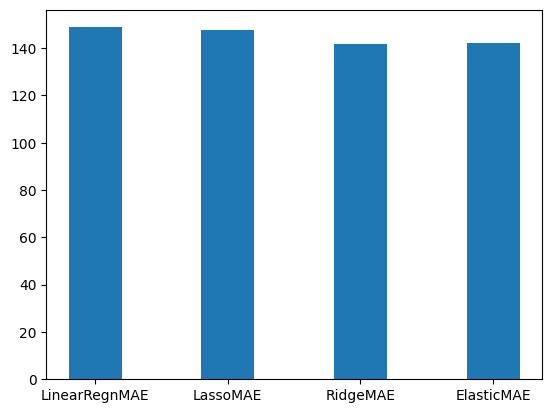

In [ ]:
import matplotlib.pyplot as plt
check = {'LinearRegnMAE': linear_reg_mae, 'LassoMAE': lasso_mae, 'RidgeMAE': ridge_mae, 'ElasticMAE': elastic_mae}
plt.bar(check.keys(), check.values(), width = 0.4)

## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y, order=2):
    poly_model = make_pipeline(PolynomialFeatures(order, include_bias=False), LinearRegression(fit_intercept=True)) 
    poly_model.fit(X, y)  
    return poly_model
# Compare on training dataset
poly_model = build_pipeline(trainX, trainY)
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  139.57986261880774
mean absolute error of linear model (with poly transform) on test set  143.15641167966817


During experiment with polynomial orders in the range of 2 to 5, we see that increasing the order of the polynomial also increased the complexity of the model. And as the complexity increased, the mean absolute error of the model also increased, indicating that the model performance worsened. Additionally, when fitting the model with higher polynomial orders resulted in longer running times

In [ ]:
orders_range = [2, 3, 4, 5]
best_results = float('inf')
best_order = 2
import time
for order in orders_range:
    start = time.time()
    poly_model = build_pipeline(trainX, trainY, order=order)
    end = time.time()
    total_time = end - start
    print(f'The running time when fitting is: {total_time}s')
    test_pred = poly_model.predict(testX)
    train_pred = poly_model.predict(trainX)
    print(f'Mean absolute error of linear model with poly transform order {order} is {mean_absolute_error(train_pred, trainY)} on train set')
    print(f'Mean absolute error of linear model with poly transform order {order} is {mean_absolute_error(test_pred, testY)} on test set')
    print("")
    if mean_absolute_error(test_pred, testY) < best_results:
        best_results = mean_absolute_error(test_pred, testY)
        best_order = order

print(f'Linear model with poly transform of order {best_order} is the best model with mean absolute error: {best_results}')

The running time when fitting is: 0.10645151138305664s
Mean absolute error of linear model with poly transform order 2 is 139.57986261880774 on train set
Mean absolute error of linear model with poly transform order 2 is 143.15641167966817 on test set

The running time when fitting is: 0.7601101398468018s
Mean absolute error of linear model with poly transform order 3 is 142.96825191938333 on train set
Mean absolute error of linear model with poly transform order 3 is 146.94528973417187 on test set

The running time when fitting is: 2.3844356536865234s
Mean absolute error of linear model with poly transform order 4 is 151.84735041408325 on train set
Mean absolute error of linear model with poly transform order 4 is 157.5489694818832 on test set

The running time when fitting is: 8.06022334098816s
Mean absolute error of linear model with poly transform order 5 is 166.51259084474012 on train set
Mean absolute error of linear model with poly transform order 5 is 177.3609581199113 on test 